# 1. Perkenalan

Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Luis Fernando - FTDS 010 - Milestone 1

Nama Dataset : bank-additional-full

Penjelasan Dataset :
Dataset ini merupakan data mengenai direct marketing campaign (melalui phone calls atau telemarketing) pada institusi bank di Portugal. Tujuan dari dataset ini adalah menyusun feature apa saja yang dianggap dapat memprediksi 'apakah client ingin berlangganan / ditawarkan deposit berjangka (target variable kolom bernama 'y')'

Deskripsi data :
- Data merupakan data yang berasal dari Mei 2008 hingga November 2010
- Semua data (setelah diperiksa) tidak ada missing values
- Jumlah data terdiri dari 41188 baris dan 20 kolom
- Bank-full-csv (data yang digunakan)
- Tujuan klasifikasi : memprediksi client ingin berlangganan (yes/no) pada deposit berjangka (kolom y)

Informasi Atribut :
1. Age (umur) : bersifat numerik
2. Job (pekerjaan) : bersifat kategorikal , valuenya unique.
3. Marital (status kawin) : bersifat kategorikal , valuenya unique
4. Education (pendidikan terakhir client) : bersifat kategorikal
5. Default (pernah kredit atau tidak) : bersifat kategorikal 
6. Housing (pernah kredit cicilan rumah) : bersifat kategorikal
7. Loan (pernah mengajukan pinjaman? ) : bersifat kategorikal
8. Contact (cara melakukan komunikasi) : bersifat kategorikal
9. Month (terakhir dikontak dalam bentuk bulan) : bersifat kategorikal
10. Day of week (terakhir dikontak dalam bentuk hari) : bersifat kategorikal
11. Duration (durasi terakhir dikontak, dalam detik) : bersifat numerik -- kemungkinan atribut ini mempengaruhi target output (kalau durasi nya 0, kemudian sudah pasti y = no)
12. Campaign (jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini) : bersifat numerik
13. pdays (jumlah hari yang telah dilewati setelah client menerima tawaran dari kampanye sebelumnya) : bersifat numerik , kalau 999 artinya client sebelumnya belum pernah dikontak
14. Previous (Jumlah kontak yang dilakukan sebelum kampanye pada client ini)
15. Poutcome (Outcome dari kampanye marketing sebelumnya) : bersifat kategorikal
16. Emp.var.rate (employment variation rate) : bersifat numerik , indikator kuartal
17. Cons.price.idx (consumer price index) : bersifat numerik , indikator bulanan
18. Cons.conf.idx (consumer confidence index) : bersifat numerik , indikator bulanan
19. Euribor3m (euribor 3 month rate) : bersifat numerik , indikator harian
20. nr.employed (jumlah karyawan) : bersifat numerik , indikator kuartal

Output variable :

21. y - apakah client berlangaanan deposit berjangka ? : bersifat biner , 'yes' dan 'no'

Objectives : 
1. Dari beberapa algoritma yang diminta , apakah algoritma yang dianggap cocok dan metricsnya 'lebih baik' dibandingkan dengan algoritma lainnya? 
2. Jika sudah , bagaimana jika dituning ? Apakah ada perubahan ? 
3. Mengimplementasi model pada data inference
4. Dapat menarik kesimpulan yang tepat dari uji coba model

# 2. Import Libraries

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None
from datetime import datetime as dt

# 3. Data Loading

Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df = pd.read_csv('../dataset/bank-additional-full.csv',sep=';')

## Eliminasi Data Awal 

Menurut saya, berdasarkan penjelasan yang telah disampaikan pada informasi atribut :

Jika duration nya 0 , maka sudah pasti y = no , sehingga menurut saya alangkah baiknya yang duration nya 0 dihapus saja. Karena akan mengganggu proses modelling jika udah ada feature mutlak seperti itu

In [3]:
df_inf = df[df['duration']==0]

In [4]:
df.drop(df[df['duration']==0].index,inplace=True)

In [5]:
df.reset_index(inplace=True)

In [6]:
df.drop(labels='index',axis=1,inplace=True)

## Convert to Categorical 

Kolom `pdays` menunjukkan bahwa 999 artinya client tersebut belum pernah dikontak sebelumnya, sehingga angka ini sangat mencolok jika kita tidak berusaha menggantinya ke tipe data kategorikal pada kolom ini

## Identitas Data

Melihat representasi data

In [7]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.rename(columns={'y':'result'},inplace=True)

Melihat info mengenai masing - masing kolom serta data yang kosong

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41184 entries, 0 to 41183
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41184 non-null  int64  
 1   job             41184 non-null  object 
 2   marital         41184 non-null  object 
 3   education       41184 non-null  object 
 4   default         41184 non-null  object 
 5   housing         41184 non-null  object 
 6   loan            41184 non-null  object 
 7   contact         41184 non-null  object 
 8   month           41184 non-null  object 
 9   day_of_week     41184 non-null  object 
 10  duration        41184 non-null  int64  
 11  campaign        41184 non-null  int64  
 12  pdays           41184 non-null  int64  
 13  previous        41184 non-null  int64  
 14  poutcome        41184 non-null  object 
 15  emp.var.rate    41184 non-null  float64
 16  cons.price.idx  41184 non-null  float64
 17  cons.conf.idx   41184 non-null 

Data di atas menunjukkan bahwa:
1. Data tidak menunjukkan missing values, sehingga untuk handle missing values mungkin tidak akan dilakukan. 
2. Data outlier tidak akan dihandle, karena menurut saya data tersebut merupakan data yang sesuai dengan kejadian aslinya . Sehingga, nantinya model dapat beradaptasi dengan data test atau data inference yang baru
3. Data feature cukup banyak menyediakan data yang bersifat kategorik dibandingkan numerik

Melihat deskripsi dari kolom bertipe data numerik

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000,41184.00000,41184.000000,41184.000000,41184.000000,41184.000000
mean,40.023529,258.310096,2.567381,962.471907,0.172980,0.08192,93.575686,-40.502508,3.621337,5167.037145
std,10.421044,259.279344,2.769895,186.919638,0.494922,1.57096,0.578849,4.628128,1.734438,72.252762
min,17.000000,1.000000,1.000000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.10000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000


Dari data di atas dapat dilihat bahwa

1. Rentang `age` atau umur yang berada pada data di kisaran umur 17 hingga 98 tahun.
2. Rentang `duration` (durasi terakhir dikontak) berada pada 0 detik (tidak tertarik deposito berjangka) hingga 4918 detik
3. `Consumer price index` berada di rentang yang cukup kecil yaitu 92.2 - 94.76
4. `Consumer confidence index` berada di rentang -50.8 - -26.9
5. `Euribor3m` berada di rentang 0.63 - 5.04
6. Jumlah employee (`nr.employed`) berada di rentang 4963 - 5228

Melihat deskrpsi dari kolom bertipe data object

In [11]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,result
count,41184,41184,41184,41184,41184,41184,41184,41184,41184,41184,41184
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10421,24925,12167,32584,21573,33946,26141,13767,8623,35559,36544


Melihat jumlah data unique dari masing - masing kolom

In [12]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1543
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
result               2
dtype: int64

Dari tampilan di atas menunjukkan bahwa :

Untuk saat ini , yang dapat diasumsikan sebagai feature numerik adalah : `age` , `duration` , `campaign` , `pdays` , `emp.var.rate` , `cons.price.idx` , `cons.conf.idx` , `nr.employed` . Sedangkan sisanya adalah numerik (kondisi ini masih dapat berubah sewaktu waktu)

## Persebaran Data

Melihat persebaran data

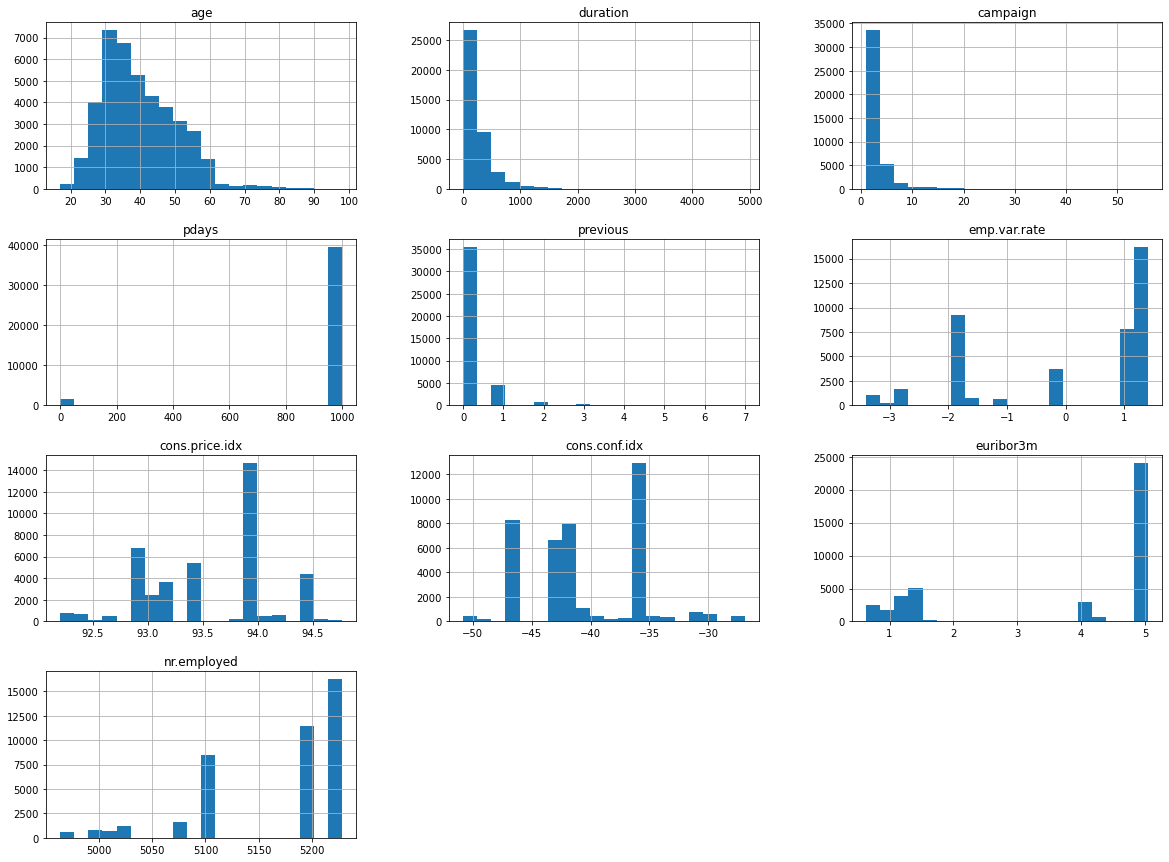

In [13]:
df.hist(bins=20,figsize=(20,15))
plt.show()

Dari persebaran data di atas :

1. Hanya data `age` , `duration` , dan `campaign` yang cenderung numerik , kemungkinan beberapa feature numerik lainnya cenderung berada pada kondisi yang cenderung 'kategoris'. Sehingga alangkah baiknya tidak menghandle outlier untuk tahu persebaran data sebenarnya berdasarkan feature aktualnya
2. Data menunjukkan bahwa umur yang ditawarkan oleh marketing bank kebanyakan di kisaran 25 - 45 tahun (umur yang cenderung produktif)

# 4. Explorary Data Analysis (EDA)

## Visualisasi Data

Mari kita coba lihat beberapa visualisasi data yang diharapkan dapat memberikan informasi berdasarkan masing - masing feature , atau hubungan target terhadap masing - masing feature

### Jumlah yang ya dan tidak pada ketertarikan terhadap deposit berjangka

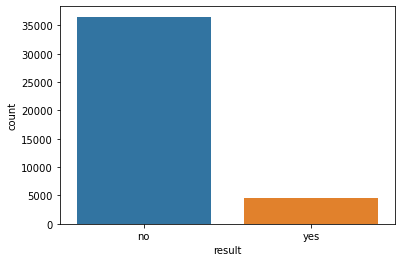

no     36544
yes     4640
Name: result, dtype: int64

In [14]:
sns.countplot(data =df,x='result')
plt.show()
df['result'].value_counts()

Dari visualisasi di atas dapat dilihat bahwa data cenderung tidak seimbang (imbalance) , sehingga untuk mempermudah analisa saat splitting data memerlukan startify agar data bisa memprediksi yang 'yes' juga . Karena biasanya data yang imbalance (apalagi kasus di atas) , akan membuat data sulit memprediksi ke arah 'yes'

### Hubungan antara umur dengan keinginan untuk berlangganan deposit berjangka

In [15]:
selected_data = df.groupby(['age','result'])['campaign'].count().reset_index()
selected_data.rename({'campaign':'jumlah'},axis=1,inplace=True)

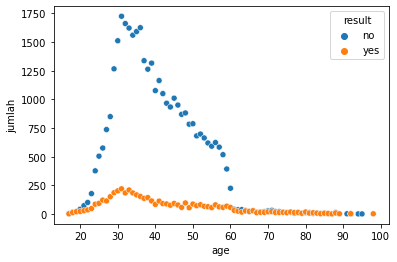

In [16]:
sns.scatterplot(data = selected_data,x='age',y='jumlah',hue='result')
plt.show()

Kita lihat lagi secara detail antara masing - masing yes dan no

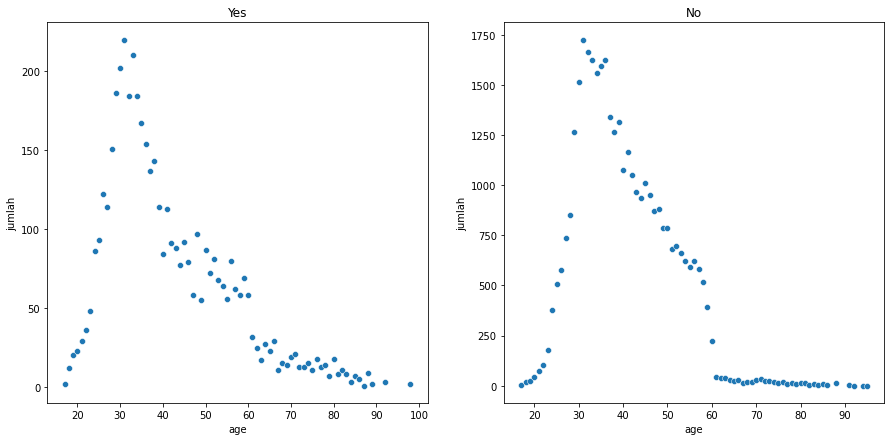

In [17]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.scatterplot(data=selected_data[selected_data['result']=='yes'],x='age',y='jumlah',ax=ax[0])
ax[0].title.set_text("Yes")
sns.scatterplot(data=selected_data[selected_data['result']=='no'],x='age',y='jumlah',ax=ax[1])
ax[1].title.set_text("No")

Dari sini dapat dilihat bahwa:
1. Ternyata yang meng iyakan untuk tertarik dengan deposit berjangka merata ke semua umur
2. Pola menunjukkan bentuk yang sama, artinya masih cukup seimbang antara yang tertarik dengan tidak jika dilihat dari umurnya, meskipun dari kuantitas memang lebih banyak yang tidak tertarik (karena data juga memang lebih banyak yang tidak tertarik)

### Hubungan Marital dengan ingin ketertarikan deposit berjangka

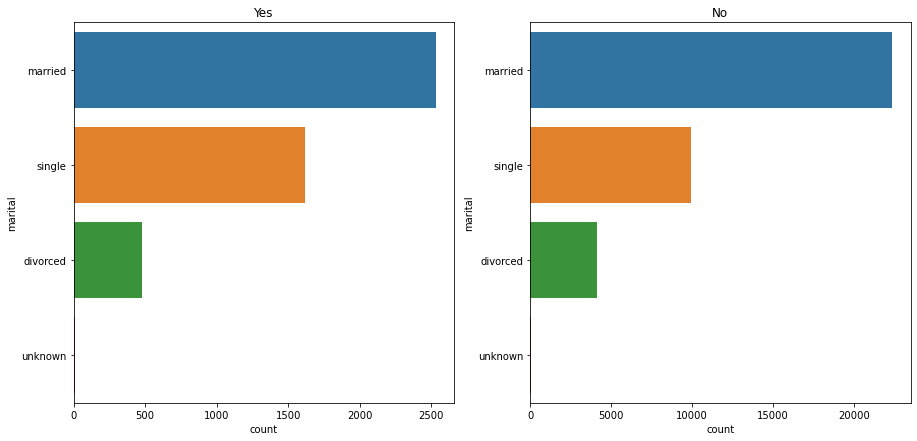

In [18]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.countplot(data=df[df['result']=='yes'],y='marital',ax=ax[0],order=df[df['result']=='yes']['marital'].value_counts().index)
sns.countplot(data=df[df['result']=='no'],y='marital',ax=ax[1],order=df[df['result']=='no']['marital'].value_counts().index)
ax[0].title.set_text("Yes")
ax[1].title.set_text("No")
plt.show()

In [19]:
print("Total data yang yes: ",df[df['result']=='yes']['result'].count())
df[df['result']=='yes']['marital'].value_counts(normalize=True)

Total data yang yes:  4640


married     0.545690
single      0.349138
divorced    0.102586
unknown     0.002586
Name: marital, dtype: float64

In [20]:
print("Total data yang no: ",df[df['result']=='no']['result'].count())
df[df['result']=='no']['marital'].value_counts(normalize=True)

Total data yang no:  36544


married     0.612768
single      0.272220
divorced    0.113151
unknown     0.001861
Name: marital, dtype: float64

Dari data di atas :

Terlihat bahwa baik 'yes' dan 'no' pada data tersebut, tetap saja didominasi oleh married dan single. Maka marital relasinya terhadap hasil tidak terlalu berpengaruh secara signifikan jika dilihat dari persentase 'yes' dan 'no' nya

### Hubungan antara education dengan hasil

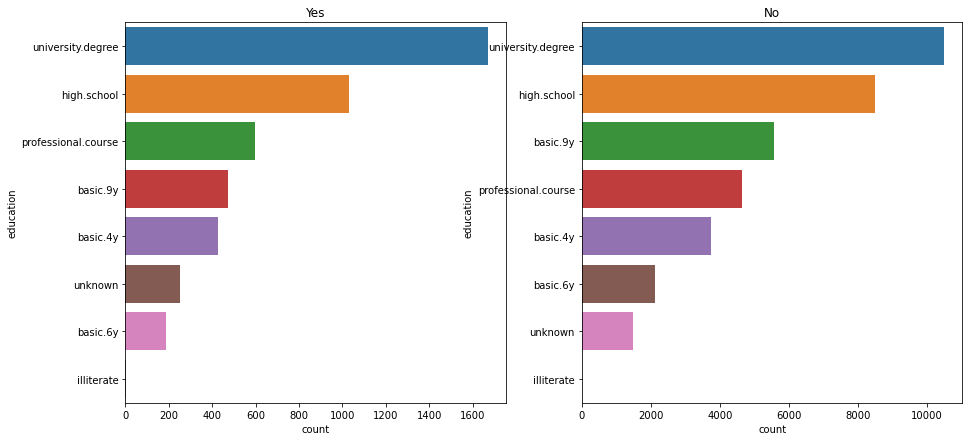

In [21]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.countplot(data=df[df['result']=='yes'],y='education',ax=ax[0],order=df[df['result']=='yes']['education'].value_counts().index)
sns.countplot(data=df[df['result']=='no'],y='education',ax=ax[1],order=df[df['result']=='no']['education'].value_counts().index)
ax[0].title.set_text("Yes")
ax[1].title.set_text("No")
plt.show()

In [22]:
df['education'].value_counts(normalize=True)

university.degree      0.295430
high.school            0.230988
basic.9y               0.146756
professional.course    0.127307
basic.4y               0.101399
basic.6y               0.055653
unknown                0.042031
illiterate             0.000437
Name: education, dtype: float64

In [23]:
print("Total data yang yes: ",df[df['result']=='yes']['result'].count())
df[df['result']=='yes']['education'].value_counts(normalize=True)

Total data yang yes:  4640


university.degree      0.359914
high.school            0.222198
professional.course    0.128233
basic.9y               0.101940
basic.4y               0.092241
unknown                0.054095
basic.6y               0.040517
illiterate             0.000862
Name: education, dtype: float64

In [24]:
print("Total data yang no: ",df[df['result']=='no']['result'].count())
df[df['result']=='no']['education'].value_counts(normalize=True)

Total data yang no:  36544


university.degree      0.287243
high.school            0.232104
basic.9y               0.152446
professional.course    0.127189
basic.4y               0.102561
basic.6y               0.057574
unknown                0.040499
illiterate             0.000383
Name: education, dtype: float64

Dari data di atas :

Dapat dilihat bahwa antara 'yes' dan 'no' , juga didominasi oleh yang berpendidikan (sarjana , sma , serta prof.course atau basic.9y). Sehingga terjadi keseimbangan antara yang tertarik atau tidak tertarik terhadap berlangganan deposit berjangka secara persentasenya

### Hubungan antara default credit dengan ketertarikan terhadap deposit berjangka

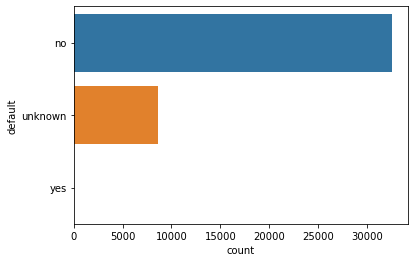

In [25]:
sns.countplot(data=df,y='default')
plt.show()

In [26]:
print("Total data yang yes: ",df[df['result']=='yes']['result'].count())
df[df['result']=='yes']['default'].value_counts(normalize=True)

Total data yang yes:  4640


no         0.904526
unknown    0.095474
Name: default, dtype: float64

In [27]:
print("Total data yang no: ",df[df['result']=='no']['result'].count())
df[df['result']=='no']['default'].value_counts(normalize=True)

Total data yang no:  36544


no         0.776790
unknown    0.223128
yes        0.000082
Name: default, dtype: float64

In [28]:
df[df['default']=='yes']['result'].value_counts()

no    3
Name: result, dtype: int64

Dari data di atas :

Terlihat bahwa untuk yang tertarik terhadap memasukkan deposit berjangka , tidak ada yang `default` nya  'yes'. Namun , hanya ada 3 data yang `default` nya 'yes' dengan `result` 'no'

### Melihat hubungan antara memiliki cicilan rumah atau tertarik terhadap deposit berjangka

In [29]:
print("Total data yang yes: ",df[df['result']=='yes']['result'].count())
df[df['result']=='yes']['housing'].value_counts(normalize=True)

Total data yang yes:  4640


yes        0.540302
no         0.436638
unknown    0.023060
Name: housing, dtype: float64

In [30]:
print("Total data yang no: ",df[df['result']=='no']['result'].count())
df[df['result']=='no']['housing'].value_counts(normalize=True)

Total data yang no:  36544


yes        0.521727
no         0.454110
unknown    0.024163
Name: housing, dtype: float64

Dari data di atas :

1. Terlihat bahwa meskipun orang sedang melakukan cicilan rumah , tetap tertarik untuk melakukan deposit berjangka
2. Persebaran antara cicilan rumah untuk masing masing yes dan no , tersebar cukup merata.

### Hubungan antara personal loan dengan ketertarikan deposit berjangka

In [31]:
print("Total data yang yes: ",df[df['result']=='yes']['loan'].count())
df[df['result']=='yes']['loan'].value_counts(normalize=True)

Total data yang yes:  4640


no         0.829741
yes        0.147198
unknown    0.023060
Name: loan, dtype: float64

In [32]:
print("Total data yang no: ",df[df['result']=='no']['loan'].count())
df[df['result']=='no']['loan'].value_counts(normalize=True)

Total data yang no:  36544


no         0.823555
yes        0.152282
unknown    0.024163
Name: loan, dtype: float64

Dari data di atas, dapat dilihat bahwa :

Untuk yang 'yes', dominasinya secara persentase kurang lebih sama seperti dengan yang 'no' , sehingga masih cukup seimbang antara keputusan ingin deposit berjangka pada orang yang sedang memiliki pinjaman ,dengan tidak.

### Hubungan antara jenis kontak yang dilakukan dengan keinginan dalam deposit berjangka

In [33]:
print("Total data yang yes: ",df[df['result']=='yes']['contact'].count())
df[df['result']=='yes']['contact'].value_counts(normalize=True)

Total data yang yes:  4640


cellular     0.830388
telephone    0.169612
Name: contact, dtype: float64

In [34]:
print("Total data yang no: ",df[df['result']=='no']['contact'].count())
df[df['result']=='no']['contact'].value_counts(normalize=True)

Total data yang no:  36544


cellular     0.609895
telephone    0.390105
Name: contact, dtype: float64

Dari data di atas : 

Dapat dilihat bahwa yang yes kebanyakan karena didominasi oleh yang menggunakan celular dibanding telephone. Tetapi perlu diketahui feature ini pastinya memerlukan dukungan dari feature lain untuk memastikan apakah dia tertarik deposit berjangka atau tidak

### Hubungan antara Duration dengan memutuskan berdeposit 

Pada deskripsi feature oleh websitenya , `duration` tidak dapat dijadikan feature untuk tujuan yang sifatnya predictive, hanya untuk benchmark

### Hubungan antara pdays dengan memutuskan deposit

In [35]:
selected_data1 = df.groupby(['pdays','result'])['campaign'].count().reset_index()
selected_data1.rename({'campaign':'jumlah'},axis=1,inplace=True)

In [36]:
print("Total data yang no: ",df[df['result']=='no']['pdays'].count())
df[df['result']=='no']['pdays'].value_counts(normalize=True)

Total data yang no:  36544


999    0.985004
3      0.003858
6      0.003366
4      0.001505
12     0.000876
9      0.000794
2      0.000657
10     0.000602
7      0.000547
1      0.000493
5      0.000465
11     0.000356
14     0.000246
13     0.000219
15     0.000219
8      0.000164
17     0.000164
0      0.000137
16     0.000137
18     0.000082
19     0.000055
22     0.000027
20     0.000027
Name: pdays, dtype: float64

In [37]:
print("Total data yang yes: ",df[df['result']=='yes']['pdays'].count())
df[df['result']=='yes']['pdays'].value_counts(normalize=True)

Total data yang yes:  4640


999    0.791595
3      0.064224
6      0.062284
4      0.013578
7      0.008621
2      0.007974
9      0.007543
10     0.006466
5      0.006250
13     0.006034
12     0.005603
15     0.003448
11     0.003233
8      0.002586
14     0.002371
0      0.002155
1      0.001724
16     0.001293
18     0.000862
21     0.000431
22     0.000431
17     0.000431
25     0.000216
26     0.000216
27     0.000216
19     0.000216
Name: pdays, dtype: float64

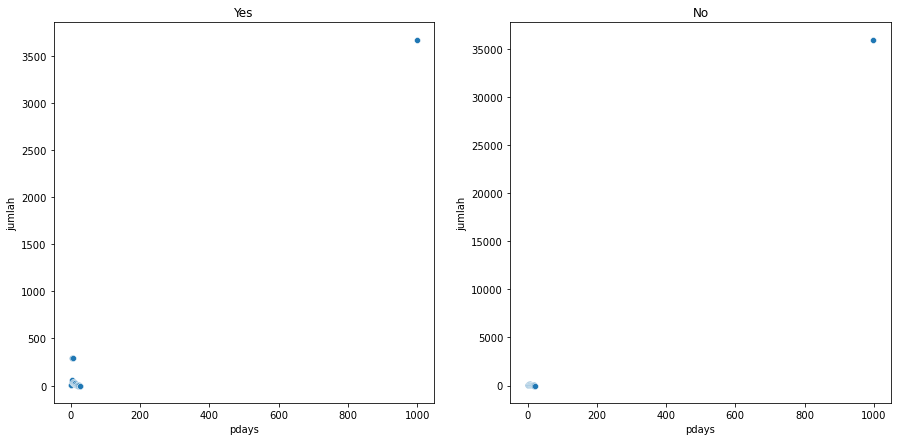

In [38]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.scatterplot(data=selected_data1[selected_data1['result']=='yes'],x='pdays',y='jumlah',ax=ax[0])
ax[0].title.set_text("Yes")
sns.scatterplot(data=selected_data1[selected_data1['result']=='no'],x='pdays',y='jumlah',ax=ax[1])
ax[1].title.set_text("No")

Dari grafik di atas :

Pdays 999 mengartikan bahwa client sebelumnya belum pernah dihubungi. 

Kemudian dari kondisi data ,sepertinya akan lebih baik jika membuat label baru untuk membedakan  :
- yang belum pernah dikontak
- dikontak kurang dari 1 minggu lalu
- dikontak sudah lebih dari 1 minggu

In [39]:
selected_data2 = df.groupby(['emp.var.rate','result'])['campaign'].count().reset_index()
selected_data2.rename({'campaign':'jumlah'},axis=1,inplace=True)

In [40]:
print("Total data yang yes: ",df[df['result']=='yes']['emp.var.rate'].count())
df[df['result']=='yes']['emp.var.rate'].value_counts(normalize=True)

Total data yang yes:  4640


-1.8    0.314871
 1.4    0.186638
-2.9    0.128017
-3.4    0.097845
-1.7    0.086853
-1.1    0.064871
 1.1    0.051724
-0.1    0.050000
-3.0    0.018966
-0.2    0.000216
Name: emp.var.rate, dtype: float64

In [41]:
print("Total data yang no: ",df[df['result']=='no']['emp.var.rate'].count())
df[df['result']=='no']['emp.var.rate'].value_counts(normalize=True)

Total data yang no:  36544


 1.4    0.420507
-1.8    0.211280
 1.1    0.205834
-0.1    0.094434
-2.9    0.029252
-3.4    0.016884
-1.7    0.010125
-1.1    0.009140
-3.0    0.002299
-0.2    0.000246
Name: emp.var.rate, dtype: float64

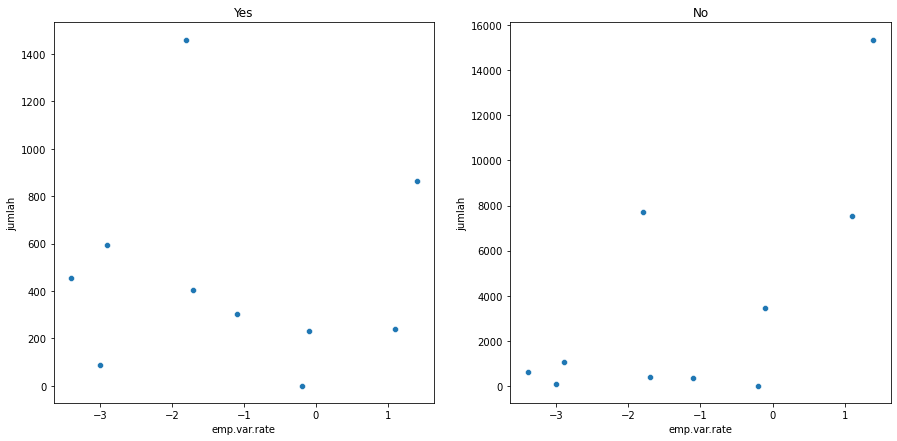

In [42]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.scatterplot(data=selected_data2[selected_data2['result']=='yes'],x='emp.var.rate',y='jumlah',ax=ax[0])
ax[0].title.set_text("Yes")
sns.scatterplot(data=selected_data2[selected_data2['result']=='no'],x='emp.var.rate',y='jumlah',ax=ax[1])
ax[1].title.set_text("No")

Dari data di atas :

Menurut saya baik emp.var.rate sedang tinggi atau rendah , tidak terlalu mendominasi untuk memutuskan apakah client ingin melakukan deposit berjangka atau tidak , untuk lebih lanjut kita bisa lihat korelasinya ,meskipun dari gambar terlihat korelasinya rendah

### Hubungan antara consumer price index dengan keinginan untuk melakukan deposit

In [43]:
selected_data3 = df.groupby(['cons.price.idx','result'])['campaign'].count().reset_index()
selected_data3.rename({'campaign':'jumlah'},axis=1,inplace=True)

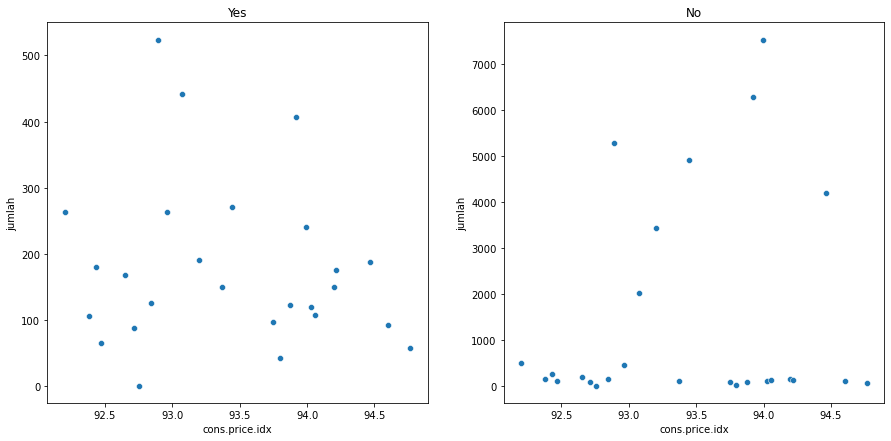

In [44]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.scatterplot(data=selected_data3[selected_data3['result']=='yes'],x='cons.price.idx',y='jumlah',ax=ax[0])
ax[0].title.set_text("Yes")
sns.scatterplot(data=selected_data3[selected_data3['result']=='no'],x='cons.price.idx',y='jumlah',ax=ax[1])
ax[1].title.set_text("No")

Dari data di atas terlihat bahwa korelasi pada consumer price index juga tidak terlalu kuat , atau dalam kata lain , tidak terlalu berpengaruh terhadap keinginan client dalam melakukan deposit berjangka. Tetapi nanti dapat dilihat lebih lanjut saat melihat korelasi menggunakan heatmap

### Hubungan antara consumer confidence index terhadap keinginan untuk melakukan deposit berjangka

In [45]:
selected_data4 = df.groupby(['cons.conf.idx','result'])['campaign'].count().reset_index()
selected_data4.rename({'campaign':'jumlah'},axis=1,inplace=True)

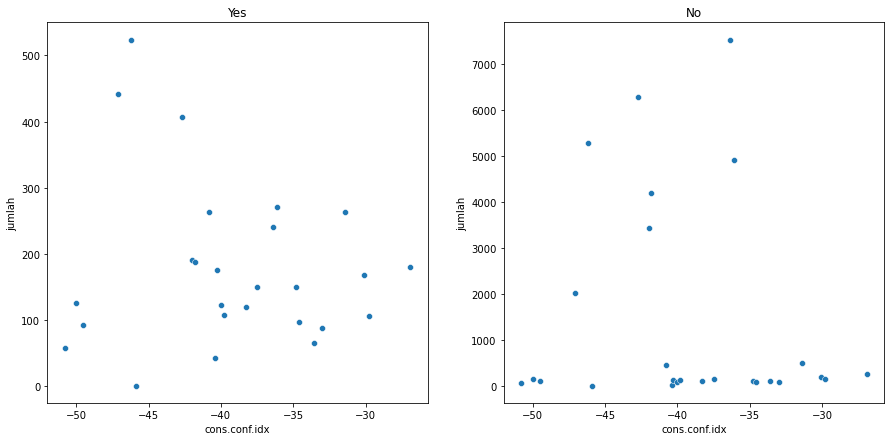

In [46]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
sns.scatterplot(data=selected_data4[selected_data4['result']=='yes'],x='cons.conf.idx',y='jumlah',ax=ax[0])
ax[0].title.set_text("Yes")
sns.scatterplot(data=selected_data4[selected_data4['result']=='no'],x='cons.conf.idx',y='jumlah',ax=ax[1])
ax[1].title.set_text("No")

Dari data di atas:

Sama seperti consumer price index, tidak ada korelasi yang sangat kuat antara consumer confidence index terhadap keinginan melakukan deposit berjangka. Namun bisa dilihat juga nanti saat correlation menggunakan heatmap untuk lebih pastinya

### Hubungan antara euribor 3 month rate dengan keingnan untuk melakukan deposit berjangka

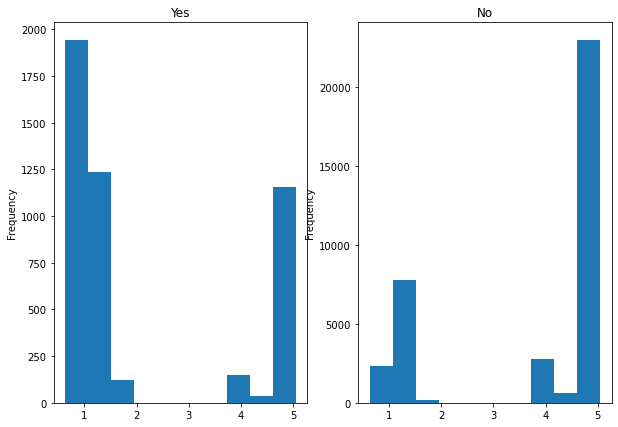

In [47]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,7))
df[df['result']=='yes']['euribor3m'].plot(kind='hist',bins=10,ax=ax[0])
df[df['result']=='no']['euribor3m'].plot(kind='hist',bins=10,ax=ax[1])
ax[0].title.set_text('Yes')
ax[1].title.set_text('No')

Dari data di atas : 

Terlihat bahwa euribor 3 m yang semakin rendah , biasanya semakin ingin orang untuk melakukan deposit berjangka . Namun untuk kasus lebih lanjut akan dilihat dari korelasi heatmap , karena asumsinya seharusnya jika euribor 3m yang semakin tinggilah , orang baru ingin melakukan deposit berjangka karena semakin tinggi euribor (atau yang biasa disebut suku bunga), semakin orang tertarik untuk melakukan deposit berjangka (menyimpan uang)

### Hubungan antara nr.employed dengan keinginan untuk melakukan deposit

In [48]:
df['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

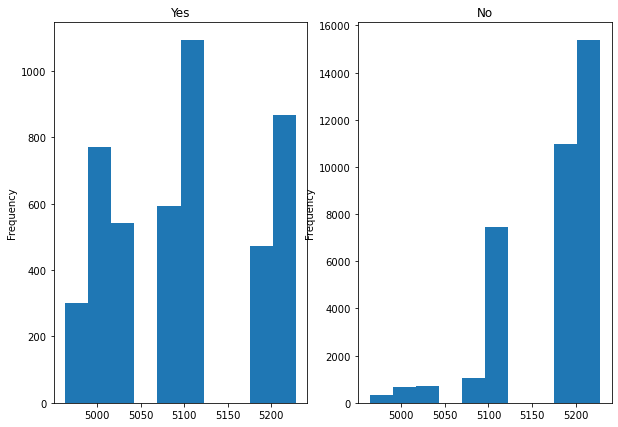

In [49]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,7))
df[df['result']=='yes']['nr.employed'].plot(kind='hist',bins=10,ax=ax[0])
df[df['result']=='no']['nr.employed'].plot(kind='hist',bins=10,ax=ax[1])
ax[0].title.set_text('Yes')
ax[1].title.set_text('No')

Dari data di atas, dapat dilihat bahwa orang yang tertarik untuk melakukan deposit, tidak terpengaruh baik ada di angka 4900 an atau 5191 , tetapi data ini masih memerlukan konfirmasi lebih lanjut menggunakan correlation dari heatmap

### Melihat hubungan antara job dengan keinginan untuk deposit berjangka

In [50]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [51]:
df[df['result']=='yes']['job'].value_counts(normalize=True)

admin.           0.291379
technician       0.157328
blue-collar      0.137500
retired          0.093534
management       0.070690
services         0.069612
student          0.059267
self-employed    0.032112
unemployed       0.031034
entrepreneur     0.026724
housemaid        0.022845
unknown          0.007974
Name: job, dtype: float64

In [52]:
df[df['result']=='no']['job'].value_counts(normalize=True)

admin.           0.248167
blue-collar      0.235716
technician       0.164541
services         0.099770
management       0.071010
entrepreneur     0.036449
retired          0.035190
self-employed    0.034807
housemaid        0.026106
unemployed       0.023807
student          0.016419
unknown          0.008018
Name: job, dtype: float64

Dari data di atas : 

Dapat dilihat bahwa admin menempati posisi yang sama baik ya dan tidak, dan yang menariknya , hanya yang retired yang terlihat cukup mencolok. Yang retired di angka 9.4% dari keseluruhan yes dan 3.5% dari keseluruhan no. Sehingga mungkin yang telah pensiun lebih menyimpan cadangan keuangannya  / dana pensiunnya ke dalam deposito berjangka

### Menghapus tanda baca yang terkandung pada feature kategorikal

Karena feature selection nanti akan sangat sensitif terhadap tanda baca yang tergantung pada data kategorikal ,maka untuk df awal perlu kita lakukan eliminasi terhadap kolom yang mengandung tanda / simbol.

In [53]:
for item in df.select_dtypes(include=object).columns.tolist():
    df[item] =  df[item].replace({'\.':''},regex=True)


In [54]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,result
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,highschool,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,highschool,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,highschool,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 5. Data Preprocessing

## Convert Column

  Pada kasus dataset ini , saya melihat bahwa `pdays`= 999 artinya client belum pernah dikontak sebelumnya , kemudian kita lihat dulu unique value `pdays` seperti apa :

In [55]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20], dtype=int64)

Dari data di atas , saya ingin mencoba membuat kolom baru untuk memisahkan mana yang : 'Dikontak kurang dari 1 minggu' , 'Dikontak lebih dari 1 minggu' , 'Belum pernah dikontak'

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [56]:
conditions = [
    (df['pdays']>=0) & (df['pdays']<=7),
    (df['pdays']>7)&(df['pdays']!=999),
    (df['pdays']==999)
]

values = ['<1 minggu','>1 minggu','belum pernah dikontak']

df['contact_status'] = np.select(conditions,values)

In [57]:
df.drop(labels='pdays',axis=1,inplace=True)

In [58]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,result,contact_status
0,56,housemaid,married,basic4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,belum pernah dikontak
1,57,services,married,highschool,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,belum pernah dikontak
2,37,services,married,highschool,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,belum pernah dikontak
3,40,admin,married,basic6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,belum pernah dikontak
4,56,services,married,highschool,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,belum pernah dikontak


## Splitting Dataset

Sekarang kita lakukan dataset terlebih dahulu untuk :

Membentuk model dari data train, menguji model dari data test

In [59]:
#traintestsplit

X = df.drop('result',axis=1)
y = df['result']

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [61]:
X_train.shape , y_train.shape

((32947, 20), (32947,))

In [62]:
X_test.shape, y_test.shape

((8237, 20), (8237,))

### Special : Pemisahan antara kolom bertipe data numerik , dan kolom bertipe data object

In [63]:
num_columns = X_train.select_dtypes(exclude=[object]).columns.tolist()
cat_columns = X_train.select_dtypes(include=[object]).columns.tolist()

In [64]:
print('Fitur bertipe data numerik: ',num_columns)
print('Fitur bertipe data kategorik: ',cat_columns)

Fitur bertipe data numerik:  ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Fitur bertipe data kategorik:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'contact_status']


In [65]:
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]
X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

## Handling Outlier

Untuk kasus ini, saya coba untuk tidak melakukan handling outlier terlebih dahulu , untuk memperoleh data yang lebih sesuai dengan keadaan aslinya. Takutnya, jika kita menghilangkan outlier, model akan lebih 'sulit' jika menemukan data yang terlalu ekstrim

## Handling Missing Values

Dalam data ini , tidak ada data yang valuenya hilang, hanya saja sebelumnya ada data yang perlu saya hapus dari awal. Contohnya baris data yang `duration` nya = 0. Karena kalau dari `duration` = 0 saja sudah ketahuan target columnya = 'no' , untuk apa kita membuat model ?

Kemudian , pada data ada beberapa kolom yang mengandung 'unknown' , yaitu kolom `job` , `marital` , dan `education` . Mari kita lihat ,apa ada data lain yang mengandung 'unknown'?

In [66]:
for item in cat_columns:
    print(f'Unique kolom pada {item}: ',X_train[item].unique())

Unique kolom pada job:  ['admin' 'technician' 'management' 'blue-collar' 'services' 'student'
 'retired' 'self-employed' 'entrepreneur' 'unemployed' 'housemaid'
 'unknown']
Unique kolom pada marital:  ['married' 'single' 'divorced' 'unknown']
Unique kolom pada education:  ['universitydegree' 'unknown' 'highschool' 'professionalcourse' 'basic9y'
 'basic6y' 'basic4y' 'illiterate']
Unique kolom pada default:  ['no' 'unknown' 'yes']
Unique kolom pada housing:  ['yes' 'no' 'unknown']
Unique kolom pada loan:  ['no' 'yes' 'unknown']
Unique kolom pada contact:  ['cellular' 'telephone']
Unique kolom pada month:  ['nov' 'may' 'jul' 'aug' 'jun' 'oct' 'apr' 'mar' 'sep' 'dec']
Unique kolom pada day_of_week:  ['fri' 'tue' 'thu' 'wed' 'mon']
Unique kolom pada poutcome:  ['failure' 'nonexistent' 'success']
Unique kolom pada contact_status:  ['belum pernah dikontak' '<1 minggu' '>1 minggu']


Dari hasil diatas ,  dapat kita lihat Kita lihat pada data train ,ada berapa persentase yang kolomnya unknown pada masing - masing kolom

In [145]:
data_count = len(X_train)
unknown_job = len(X_train[X_train['job']=='unknown'])
unknown_marital = len(X_train[X_train['marital']=='unknown'])
unknown_education = len(X_train[X_train['education']=='unknown'])
unknown_default = len(X_train[X_train['default']=='unknown'])
unknown_housing = len(X_train[X_train['housing']=='unknown'])
unknown_loan = len(X_train[X_train['loan']=='unknown'])

print("Jumlah data training keseluruhan : ",data_count)
print("Persentase data unknown job : ",unknown_job/data_count)
print("Persentase data unknown marital : ",unknown_marital/data_count)
print("Persentase data unknown education : ",unknown_education/data_count)
print("Persentase data unknown default : ",unknown_default/data_count)
print("Persentase data unknown housing : ",unknown_housing/data_count)
print("Persentase data unknown loan : ",unknown_loan/data_count)
print("Jumlah data unknown maksimal secara keseluruhan  (dalam persen): ", (unknown_marital+unknown_job+unknown_education+unknown_default+unknown_housing+unknown_loan)/data_count)

Jumlah data training keseluruhan :  32947
Persentase data unknown job :  0.008346738701550976
Persentase data unknown marital :  0.0020032172883722344
Persentase data unknown education :  0.04200685950162382
Persentase data unknown default :  0.20778826600297448
Persentase data unknown housing :  0.023583330804018577
Persentase data unknown loan :  0.023583330804018577
Jumlah data unknown maksimal secara keseluruhan  (dalam persen):  0.30731174310255865


Dari hasil di atas, terlihat bahwa secara keseluruhan ada 30.73% data yang mengandung unknown , dengan asumsi barisnya mengandung 1 unknown. Dari sini dapat dilihat bahwa data sepertinya tidak dapat dilakukan complete case analysis, melainkan melakukan impute menggunakan mode , karena data tersebut secara keseluruhan bersifat kategorikal. Maka perlu kita lakukan impute mode pada unknown masing - masing kolom

Kita lihat dulu apakah mode pada data tersebut adalah data unknown atau bukan , karena jika unknown , maka alangkah baiknya kolom tersebut di drop saja

In [68]:
for item in (['job','marital','education','default','housing','loan']):
    print(X_train[item].mode()[0])

admin
married
universitydegree
no
yes
no


Setelah melihat kondisi data mode pada masing - masing kolom yang mengandung missing values 'unknown' , kita lakukan imputasi dengan menggunakan mode

In [69]:
def impute_mode (data,variable):
    data[variable+'_unknown'] = np.where(data[variable]=='unknown',1,0)
    data[variable] = data[variable].replace(['unknown'],X_train_cat[variable].mode()[0])

In [70]:
for item in (['job','marital','education','default','housing','loan']):
    impute_mode(X_train_cat,item)

C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/514170640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable+'_unknown'] = np.where(data[variable]=='unknown',1,0)
C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/514170640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable] = data[variable].replace(['unknown'],X_train_cat[variable].mode()[0])


Kita lihat sekarang bagaimana kondisi data training kategorikal kita :

In [71]:
X_train_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,contact_status,job_unknown,marital_unknown,education_unknown,default_unknown,housing_unknown,loan_unknown
27454,admin,married,universitydegree,no,yes,no,cellular,nov,fri,failure,belum pernah dikontak,0,0,0,0,0,0
30766,technician,married,universitydegree,no,yes,yes,cellular,may,tue,nonexistent,belum pernah dikontak,0,0,1,0,0,0
15195,management,single,universitydegree,no,no,no,cellular,jul,thu,nonexistent,belum pernah dikontak,0,0,0,0,0,0
19267,admin,divorced,highschool,no,no,no,cellular,aug,wed,nonexistent,belum pernah dikontak,0,0,0,1,0,0
14677,blue-collar,married,highschool,no,no,no,cellular,jul,tue,nonexistent,belum pernah dikontak,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,blue-collar,married,basic9y,no,no,no,telephone,may,tue,nonexistent,belum pernah dikontak,0,0,0,1,0,0
5581,blue-collar,married,basic4y,no,no,no,telephone,may,mon,nonexistent,belum pernah dikontak,0,0,0,0,0,0
21952,admin,married,universitydegree,no,no,no,cellular,aug,wed,nonexistent,belum pernah dikontak,0,0,0,1,0,0
13572,blue-collar,married,basic4y,no,no,no,cellular,jul,thu,nonexistent,belum pernah dikontak,0,0,0,0,0,0


Lakukan juga hal yang sama pada data X_test nya

In [72]:
for item in (['job','marital','education','default','housing','loan']):
    impute_mode(X_test_cat,item)

C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/514170640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable+'_unknown'] = np.where(data[variable]=='unknown',1,0)
C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/514170640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable] = data[variable].replace(['unknown'],X_train_cat[variable].mode()[0])


Berikut adalah hasil data test kategorik yang telah diimputasi dengan mode data train juga

In [73]:
X_test_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,contact_status,job_unknown,marital_unknown,education_unknown,default_unknown,housing_unknown,loan_unknown
14017,admin,married,universitydegree,no,no,no,cellular,jul,fri,nonexistent,belum pernah dikontak,0,0,0,0,0,0
34041,admin,married,highschool,no,yes,no,cellular,may,wed,failure,belum pernah dikontak,0,0,0,0,0,0
38006,self-employed,single,universitydegree,no,yes,no,cellular,sep,tue,nonexistent,belum pernah dikontak,0,0,0,0,0,0
30099,admin,divorced,universitydegree,no,no,no,cellular,apr,mon,nonexistent,belum pernah dikontak,0,0,0,0,0,0
20542,blue-collar,married,basic4y,no,yes,no,cellular,aug,tue,nonexistent,belum pernah dikontak,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37427,admin,single,universitydegree,no,no,no,cellular,aug,wed,nonexistent,belum pernah dikontak,0,0,0,0,0,0
15218,technician,married,basic9y,no,no,yes,cellular,jul,thu,nonexistent,belum pernah dikontak,0,0,0,0,0,0
31659,blue-collar,divorced,universitydegree,no,yes,no,cellular,may,thu,nonexistent,belum pernah dikontak,0,0,1,0,0,0
22120,technician,married,professionalcourse,no,yes,yes,cellular,aug,thu,nonexistent,belum pernah dikontak,0,0,0,0,0,0


## Feature Scaling

Kita coba scaling model berdasarkan X_train yang bertipe data numerik terlebih dahulu (feature column data train) 

In [74]:
num_dict ={
    'Normal' : [],
    'Skew' :[]
}
for item in num_columns:
    if X_train[item].skew()>-0.5 and X_train[item].skew()< 0.5:
        num_dict['Normal'].append(item)
    else:
        num_dict['Skew'].append(item)
print("Data inputted to num_columns successfully !!!")      

Data inputted to num_columns successfully !!!


Dari data di atas , kita pisahkan terlebih dahulu , mana yang kolom skew, mana yang normal

In [75]:
num_dict

{'Normal': ['cons.price.idx', 'cons.conf.idx'],
 'Skew': ['age',
  'duration',
  'campaign',
  'previous',
  'emp.var.rate',
  'euribor3m',
  'nr.employed']}

Asumsi saya , saya akan memanfaatkan `MinMaxScaler` untuk kolom numerik berdistribusi skew, dan `StandardScaler` untuk kolom numerik berdistribusi normal

In [76]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

std_scaler.fit(X_train_num[num_dict['Normal']])
X_train_num_1 = std_scaler.transform(X_train_num[num_dict['Normal']])
X_test_num_1 = std_scaler.transform(X_test_num[num_dict['Normal']])

mm_scaler.fit(X_train_num[num_dict['Skew']])
X_train_num_2 = mm_scaler.transform(X_train_num[num_dict['Skew']])
X_test_num_2 = mm_scaler.transform(X_test_num[num_dict['Skew']])

Melihat representasi masing - masing X_train numerik setelah dilakukan scaler untuk masing" kondisi distribusi kolom

In [77]:
X_train_num_1[:5]

array([[-0.6481827 , -0.32267836],
       [-1.17802855, -1.229359  ],
       [ 0.59100077, -0.4737918 ],
       [-0.22706743,  0.95099207],
       [ 0.59100077, -0.4737918 ]])

In [78]:
X_train_num_2[:5]

array([[0.2345679 , 0.01708359, 0.        , 0.14285714, 0.6875    ,
        0.76785309, 0.8778828 ],
       [0.40740741, 0.08114704, 0.        , 0.        , 0.33333333,
        0.16096123, 0.51228733],
       [0.07407407, 0.05491153, 0.01818182, 0.        , 1.        ,
        0.98027658, 1.        ],
       [0.40740741, 0.01281269, 0.        , 0.        , 1.        ,
        0.98231693, 1.        ],
       [0.09876543, 0.03416718, 0.05454545, 0.        , 1.        ,
        0.9809567 , 1.        ]])

Setelah discaling dengan kondisi masing - masing , kita coba gabungkan menjadi 1 kembali sebagai `X_train_num_final` dan `X_test_num_final` , dalam bentuk dataframe `df_train_num`

In [79]:
X_train_num_final = np.concatenate((X_train_num_1,X_train_num_2),axis=1)
X_test_num_final = np.concatenate((X_test_num_1,X_test_num_2),axis=1)

In [80]:
df_train_num = pd.DataFrame(data=X_train_num_final,columns=[num_dict['Normal']+num_dict['Skew']])
df_test_num = pd.DataFrame(data=X_test_num_final,columns=[num_dict['Normal']+num_dict['Skew']])

In [81]:
y_train.unique()

array(['no', 'yes'], dtype=object)

## Target Convert

Kita perlu meng-convert kolom target , jika yes diganti dengan angka 1 , jika no diganti dengan angka 0

In [82]:
y_train = y_train.map(dict(yes=1,no=0))
y_test = y_test.map(dict(yes=1,no=0))

## Feature Selection

Sebelum masuk ke dalam feature encoding , kita lihat terlebih dahulu bagaimana korelasi antara masing" kolom numerik & kolom kategorik ke kolom target nya

### Korelasi kolom numerik

In [83]:
df_train_num['result'] = y_train.tolist()

In [84]:
df_train_num

,cons.price.idx,cons.conf.idx,age,duration,campaign,previous,emp.var.rate,euribor3m,nr.employed,result
0,-0.648183,-0.322678,0.234568,0.017084,0.000000,0.142857,0.687500,0.767853,0.877883,0
1,-1.178029,-1.229359,0.407407,0.081147,0.000000,0.000000,0.333333,0.160961,0.512287,1
2,0.591001,-0.473792,0.074074,0.054912,0.018182,0.000000,1.000000,0.980277,1.000000,0
3,-0.227067,0.950992,0.407407,0.012813,0.000000,0.000000,1.000000,0.982317,1.000000,0
4,0.591001,-0.473792,0.098765,0.034167,0.054545,0.000000,1.000000,0.980957,1.000000,0
...,...,...,...,...,...,...,...,...,...,...
32942,0.722168,0.886229,0.444444,0.153346,0.000000,0.000000,0.937500,0.957379,0.859735,0
32943,0.722168,0.886229,0.345679,0.033150,0.000000,0.000000,0.937500,0.957379,0.859735,0
32944,-0.227067,0.950992,0.456790,0.011186,0.000000,0.000000,1.000000,0.981637,1.000000,0
32945,0.591001,-0.473792,0.308642,0.043319,0.000000,0.000000,1.000000,0.981410,1.000000,0


<AxesSubplot:xlabel='None', ylabel='None'>

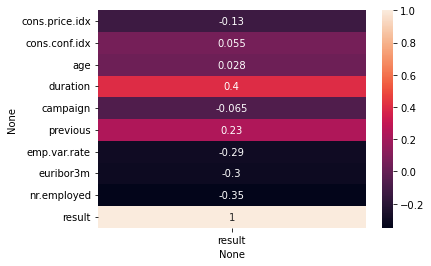

In [85]:
sns.heatmap(df_train_num.corr()[['result']],annot=True)

Dari data di atas, dapat dilihat bahwa yang memiliki korelasi lemah (dibawah 10% -- ini adalah personal judgement saya) adalah `age` dan `campaign` , serta `cons.conf.idx` . Sehingga untuk ketiga kolom ini dapat kita drop saja


In [86]:
df_train_num.drop(labels=['age','campaign','cons.conf.idx','result'],axis=1,inplace=True)
df_test_num.drop(labels=['age','campaign','cons.conf.idx'],axis=1,inplace=True)

C:\Users\Cranel\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


### Korelasi kolom kategorik

In [87]:
X_train_cat_copy = X_train_cat.copy()
X_train_cat_copy.shape,X_train_cat.columns.tolist()

((32947, 17),
 ['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome',
  'contact_status',
  'job_unknown',
  'marital_unknown',
  'education_unknown',
  'default_unknown',
  'housing_unknown',
  'loan_unknown'])

Dari beberapa kolom tersebut, akan kita gunakan kolom yang sekiranya memiliki korelasi terbaik terhadap kolom targetnya, akan kita gunakan `SelectKBest` dengan k = 5 , atau artinya kita mengambil top 5 feature kategorik dari 11 yang ada. Kemudian , saya perlu menghapus kolom arbritary pada kasus ini karena arbritary ini memiliki korelasi terhadap masing - masing kolom yang mengandung missing values di atas sebelumnya

In [88]:
X_train_cat_copy = X_train_cat_copy.drop(labels=['job_unknown','marital_unknown','education_unknown','default_unknown','housing_unknown','loan_unknown'],axis=1)

In [89]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(X_train_cat_copy)
X_train_cat_copy_enc = enc.transform(X_train_cat_copy)

In [90]:
df_cat_enc = pd.DataFrame(data=X_train_cat_copy_enc,columns=cat_columns)
df_cat_enc.head(5)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,contact_status
0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,7.0,0.0,0.0,2.0
1,9.0,1.0,6.0,0.0,1.0,1.0,0.0,6.0,3.0,1.0,2.0
2,4.0,2.0,6.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0
3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0
4,1.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,2.0


In [91]:
from sklearn.feature_selection import SelectKBest,chi2
feature_selection = SelectKBest(chi2,k=5)
feature_selection.fit(df_cat_enc,y_train)
X_train_cat_copy_new = feature_selection.transform(df_cat_enc)


In [92]:
for i in range(len(feature_selection.scores_)):
    print('Feature col %d : %f' % (i,feature_selection.scores_[i]))

Feature col 0 : 67.150638
Feature col 1 : 26.260364
Feature col 2 : 134.320432
Feature col 3 : 0.380913
Feature col 4 : 1.604436
Feature col 5 : 0.007317
Feature col 6 : 427.206903
Feature col 7 : 2.454051
Feature col 8 : 4.414445
Feature col 9 : 76.515272
Feature col 10 : 212.149218


In [93]:
for i in range(len(cat_columns)):
    print(i,cat_columns[i])

0 job
1 marital
2 education
3 default
4 housing
5 loan
6 contact
7 month
8 day_of_week
9 poutcome
10 contact_status


Yang memiliki score terbesar berada pada kolom :`job` ,`education`, `marital` , `contact` dan `contact_status`. Saya melakukan skip pada `poutcome` yang digantikan dengan `job`, karena `poutcome` sudah terwakili oleh `contact_status`.

Sehingga , dari feature selection ini , saya memutuskan untuk melakukan eliminasi terhadap kolom sisanya , dan tetap menggunakan 5 kolom kategorik terbaik. Tidak lupa, masukkan juga `arbritary values column` untuk kolom kategorik yang telah dilakukan handle missing values menggunakan median sebelumnya

In [94]:
X_train_cat = X_train_cat[['job','job_unknown','education','education_unknown','marital','marital_unknown','contact','contact_status']]
X_test_cat = X_test_cat[['job','job_unknown','education','education_unknown','marital','marital_unknown','contact','contact_status']]

## Feature Encoding

Sekarang, untuk cat_columns pada masing - masing X_train dan X_test, mari kita coba lakukan encoding

In [95]:
cat_columns_selected = X_train_cat.columns.tolist()

Untuk kolom education , saya ingin menggunakan ordinalEncoder

In [96]:
X_train_cat['education'].unique()

array(['universitydegree', 'highschool', 'professionalcourse', 'basic9y',
       'basic6y', 'basic4y', 'illiterate'], dtype=object)

Untuk ordinal encoder , akan saya urtkan terlebih dahulu dari yang terendah hingga yang tertinggi , yang labelnya dimasukkan ke dalam parameter ordinal encoder yaitu 'categories=[]'

In [97]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['illiterate','basic4y','basic6y','basic9y','highschool','professionalcourse','universitydegree']])
oe.fit(X_train_cat[['education']])
X_train_cat_ordinal = oe.transform(X_train_cat[['education']])
X_test_cat_ordinal = oe.transform(X_test_cat[['education']])

In [98]:
X_train_cat_ordinal

array([[6.],
       [6.],
       [6.],
       ...,
       [6.],
       [1.],
       [3.]])

In [99]:
X_test_cat_ordinal

array([[6.],
       [4.],
       [6.],
       ...,
       [6.],
       [5.],
       [4.]])

Untuk kolom arbitrary , perlu kita pisah agar nantinya X_train_cat selain education , dapat melakukan one hot encoding

In [100]:
arbritary_array_train = np.array(X_train_cat[['job_unknown','education_unknown','marital_unknown']])
arbritary_array_test = np.array(X_test_cat[['job_unknown','education_unknown','marital_unknown']])

Selanjutnya , kita inisiasi apa saja kolom kategorik yang akan melalui one hot encoding , yaitu hanya perlu mendrop kolom `education` , serta kolom `arbritary`-nya

In [101]:
X_train_cat_no_unknown = X_train_cat.drop(labels=['education','education_unknown','job_unknown','marital_unknown'],axis=1)
X_test_cat_no_unknown = X_test_cat.drop(labels=['education','education_unknown','job_unknown','marital_unknown'],axis=1)

Berikut adalah data train kategorik yang tidak mengandung kolom `education` serta kolom arbritary values  nya

In [102]:
X_train_cat_no_unknown.head()

,job,marital,contact,contact_status
27454,admin,married,cellular,belum pernah dikontak
30766,technician,married,cellular,belum pernah dikontak
15195,management,single,cellular,belum pernah dikontak
19267,admin,divorced,cellular,belum pernah dikontak
14677,blue-collar,married,cellular,belum pernah dikontak


Lakukan one hot encoding pada kolom yang akan melalui proses one hot encoding

In [103]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

ohe.fit(X_train_cat_no_unknown)
X_train_cat_onehot = ohe.transform(X_train_cat_no_unknown)
X_test_cat_onehot = ohe.transform(X_test_cat_no_unknown)



Setelah melakukan one hot encoding pada kolom tanpa education serta tanpa abritary values, kita gabungkan menjadi array khusus kolom kategorik

In [104]:
X_train_cat_final = np.concatenate([X_train_cat_ordinal,arbritary_array_train,X_train_cat_onehot],axis=1)
X_test_cat_final = np.concatenate([X_test_cat_ordinal,arbritary_array_test,X_test_cat_onehot],axis=1)

## Penggabungan masing" kolom numerik dan kategorik pada X_train dan X_test

Pertama , perlu kita kembalikan ke bentuk array setelah sebelumnya melakukan feature selection menggunakan tabel df_train_num 

In [105]:
X_train_num_final = np.array(df_train_num)
X_test_num_final = np.array(df_test_num)

Setelah dalam bentuk array, kita dapat menggabungkan antara data berkolom numerik dan kategoriknya

In [106]:
X_train_final = np.concatenate([X_train_num_final,X_train_cat_final],axis=1)
X_test_final = np.concatenate([X_test_num_final,X_test_cat_final],axis=1)

Kita lihat bentuk datanya seperti apa

In [107]:
X_train_final.shape

(32947, 29)

Untuk data train , data berbentuk 32947 baris dan 29 kolom. Selanjutnya kita pindah ke model definition

# 6. Model Definition

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.



In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

logreg_model = LogisticRegression()
svm = LinearSVC()
decision_tree = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn_model = KNeighborsClassifier()
naive_bayes = GaussianNB()
dt_bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=5,random_state=0)



# 7. Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [109]:
logreg_model.fit(X_train_final,y_train)
svm.fit(X_train_final,y_train)
decision_tree.fit(X_train_final,y_train)
rf.fit(X_train_final,y_train)
knn_model.fit(X_train_final,y_train)
naive_bayes.fit(X_train_final,y_train)
dt_bag_clf.fit(X_train_final,y_train)

C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  random_state=0)

In [110]:
from sklearn.metrics import accuracy_score,classification_report

In [111]:
X_train_final.shape

(32947, 29)

In [112]:
X_test_final.shape

(8237, 29)

# 8. Model Evaluation

## Evaluasi Model Testing

In [113]:
from sklearn.model_selection import cross_val_score
for item in (logreg_model,svm,decision_tree,rf,knn_model,naive_bayes,dt_bag_clf):
    y_pred_train = item.predict(X_train_final)
    y_pred_test = item.predict(X_test_final)
    acc_cross_val_train = cross_val_score(item,X_train_final,y_train,cv=3,scoring="accuracy")
    print(f'{item}')
    print('Training Score: ')
    print(f'Accuracy score train: ',accuracy_score(y_train,y_pred_train))
    print(classification_report(y_train,y_pred_train))
    print('Cross validation score [All] : ',acc_cross_val_train)
    print('Cross validation score [Mean] : ',acc_cross_val_train.mean())
    print('Cross validation score [Std] : ',acc_cross_val_train.std())
    print('Cross validation score [Range recommendation -- for test set] : ',acc_cross_val_train.mean()-acc_cross_val_train.std(),'-',acc_cross_val_train.mean()+acc_cross_val_train.std())
    
    print('===============================================================')
    
    print('Testing Score: ')
    print('Accuracy score test: ',accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))

    print('===============================================================')

    

C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

LogisticRegression()
Training Score: 
Accuracy score train:  0.9087625580477737
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29235
           1       0.67      0.37      0.48      3712

    accuracy                           0.91     32947
   macro avg       0.80      0.67      0.71     32947
weighted avg       0.90      0.91      0.90     32947

Cross validation score [All] :  [0.90794865 0.90739392 0.9093972 ]
Cross validation score [Mean] :  0.9082465868801095
Cross validation score [Std] :  0.0008445339938465981
Cross validation score [Range recommendation -- for test set] :  0.9074020528862629 - 0.9090911208739562
Testing Score: 
Accuracy score test:  0.9088260288940148
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7309
           1       0.67      0.37      0.48       928

    accuracy                           0.91      8237
   macro avg       0.80      0.67      0

C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()
Training Score: 
Accuracy score train:  0.9064254712113394
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29235
           1       0.67      0.33      0.45      3712

    accuracy                           0.91     32947
   macro avg       0.80      0.66      0.70     32947
weighted avg       0.89      0.91      0.89     32947

Cross validation score [All] :  [0.9078576  0.90520852 0.9072118 ]
Cross validation score [Mean] :  0.9067593074243275
Cross validation score [Std] :  0.0011278187189585431
Cross validation score [Range recommendation -- for test set] :  0.905631488705369 - 0.907887126143286
Testing Score: 
Accuracy score test:  0.9078548015054024
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7309
           1       0.68      0.34      0.46       928

    accuracy                           0.91      8237
   macro avg       0.80      0.66      0.70      82

## Keputusan terhadap model testing

Dari hasil keluaran di atas :

`Logistic Regression` menempati peringkat teratas, karena selisihnya hanya 0.01 antara accuracy train dan test , disusul oleh `Linear SVC` yang memiliki selisih 0.14 antara accuracy train dan test. Sedangkan sisanya, overfit pada `Decision Tree` , `Random Forest`,  `K Neighbor Classifier`, dan Bagging Classifier (baseline Decision Tree), kemudian pada `Gaussian Naive Bayes`, sebenarnya cukup bagus tetapi akurasinya tidak sebaik `Logistic Regression` atau `Linear SVC`

Dengan menggunakan `cross validaton score` , `Logistic Regression` baik train dan test accuracynya ,  masuk ke dalam range yang disarankan. Jika dibandingkan dengan kondisi model - model lainnya yang tidak dalam range cross validation, misalnya `decision tree` yang diminta memiliki range maks 88.9 , akan tetapi `train accuracy score` nya saja di angka 99.97 , sehingga test yang dilakukan terlalu overfit.

Yang perlu diingat : Ini semua bersifat subjektif , karena saya tidak melakukan hyperparameter tuning terlebih dahulu sebelum dimanfaatkan pada BASELINE MODEL yang memiliki score accuracy yang 'lebih baik' dari yang lain. (MUNGKIN SAJA, bahwa untuk algoritma lain yang tidak terpilih, setelah di-tuning,menjadi lebih baik)

Kita lihat kembali rekap metrics untuk logistic regression

In [114]:
from sklearn.metrics import roc_auc_score
y_pred_train = logreg_model.predict(X_train_final)
y_pred_test = logreg_model.predict(X_test_final)
print('Accuracy score train set: ',accuracy_score(y_train,y_pred_train))
print('Accuracy score test set: ',accuracy_score(y_test,y_pred_test))
print('Classification Report:\n ',classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred_test))

Accuracy score train set:  0.9087625580477737
Accuracy score test set:  0.9088260288940148
Classification Report:
                precision    recall  f1-score   support

           0       0.92      0.98      0.95      7309
           1       0.67      0.37      0.48       928

    accuracy                           0.91      8237
   macro avg       0.80      0.67      0.71      8237
weighted avg       0.90      0.91      0.90      8237

ROC AUC Score: 0.6729797875552577


Dari kondisi di atas , dapat kita lihat bahwa ROC AUC Score berada di angka 0.67 (>0.5) yang artinya untuk saat ini model ini dapat diandalkan. Akan tetapi , coba kita gunakan grid search CV dengan beberapa list parameter yang telah ditentukan , apakah bisa menemukan ROC AUC yang lebih tinggi , serta hasil metrics lainnya yang lebih tinggi atau tidak. 

## Grid Search CV (CrossValidation) menggunakan Logistic Regression

Saya mencoba memanfaatkan hyperparameter, dengan grid yang telah ditentukan melalui website ini :

https://medium.com/@adiptamartulandi/tuning-hyperparameters-logistic-regression-menggunakan-grid-search-ucupstory-fb1ab9db082a

In [115]:
from sklearn.model_selection import GridSearchCV

params_grid ={
    'penalty' : ['l1','l2'],
    'C'     : np.logspace(-4,4,20)
}

logreg_model_gscv = GridSearchCV(logreg_model,params_grid,cv=10)

logreg_model_gscv.fit(X_train_final,y_train)



C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Cranel\anaconda3\lib\site-packages\sklearn\model_selecti

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

## Best Parameters ???

Berikut adalah paramter yang dianggap lebih baik dari beberapa list parameter pada grid yang telah ditentukan :

In [116]:
logreg_model_gscv.best_params_

{'C': 4.281332398719396, 'penalty': 'l2'}

## Let's Use the Parameters for test set

Mari kita coba manfaatkan model dengan kondisi parameters di atas untuk test set kita, apakah metricsnya lebih baik atau tidak.

In [117]:
logreg_model_gscv_best = logreg_model_gscv.best_estimator_

y_pred_train = logreg_model_gscv_best.predict(X_train_final)
y_pred_test = logreg_model_gscv_best.predict(X_test_final)
print('Accuracy score train set: ',accuracy_score(y_train,y_pred_train))
print('Accuracy score test set: ',accuracy_score(y_test,y_pred_test))
print('Classification Report:\n ',classification_report(y_test,y_pred_test))
print('ROC AUC Score:',roc_auc_score(y_test,y_pred_test))

Accuracy score train set:  0.9095517042522839
Accuracy score test set:  0.9089474323175913
Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.98      0.95      7309
           1       0.67      0.38      0.49       928

    accuracy                           0.91      8237
   macro avg       0.80      0.68      0.72      8237
weighted avg       0.90      0.91      0.90      8237

ROC AUC Score: 0.6801039607522139


Dari hasil di atas :

Terlihat bahwa setelah memanfaatkan `GridSearchCV` pada `LogisticRegression` yang belum dituning , memiliki perbedaan hasil dengan setelah dituning. Namun , perbedaan itu tidak mencolok , apalagi ROC AUC Score yang hanya meningkat 0.8% dibandingkan sebelum tuning. Peningkatan yang tidak terlalu signifikan tentu disebabkan karena kondisi menentukan hyperparameter grid yang cukup sembarang , sehingga menjadikan model tidak bisa berkembang lebih lanjut. Jika ingin lebih tinggi lagi , mungkin mempertimbangkan untuk menggunakan hyperparameter yang lebih luas (tidak hanya mengandalkan C atau penalty), bisa meningkatkan level metrics ke tingkat lebih tinggi lagi.

# 9. Model Inference

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

Saya ingin mengimplementasikan data inference dari  `df_inf` (dari yang duration nya 0, sebelum dieliminasi) . Tetapi , nanti duration nya akan saya acak menggunakan data lain agar tidak menggunakan duration 0 tersebut.

In [118]:
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,0,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,0,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,0,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,0,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


In [119]:
df_inf.loc[:,'duration'] = df_inf['duration'].apply(lambda x:np.random.random_integers(1,200))

C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/352154691.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 200 + 1) instead
  df_inf.loc[:,'duration'] = df_inf['duration'].apply(lambda x:np.random.random_integers(1,200))
C:\Users\Cranel\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [120]:
df_inf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,83,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,174,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,111,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,162,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


 Hapus label / kolom target

In [121]:
df_inf.drop(labels='y',axis=1,inplace=True)

C:\Users\Cranel\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Lakukan data preprocessing yang sama pada df_inf , seperti yang dilakukan pada data df

### Penghapusan '.' pada value kolom kategorik

In [122]:
for item in df_inf.select_dtypes(include=object).columns.tolist():
    df_inf[item] =  df_inf[item].replace({'\.':''},regex=True)

C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/3986816439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf[item] =  df_inf[item].replace({'\.':''},regex=True)


### Convert kolom `pdays` , dengan memanfaatkan kolom baru '`contact_status`'

In [123]:
conditions = [
    (df_inf['pdays']>=0) & (df_inf['pdays']<=7),
    (df_inf['pdays']>7)&(df_inf['pdays']!=999),
    (df_inf['pdays']==999)
]

values = ['<1 minggu','>1 minggu','belum pernah dikontak']

df_inf['contact_status'] = np.select(conditions,values)


C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/3014547558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inf['contact_status'] = np.select(conditions,values)


### Drop kolom '`pdays`' , karena sudah digantikan oleh contact_status

In [124]:
df_inf.drop(labels='pdays',axis=1,inplace=True)

## Memisahkan kolom numerik dan kategorik

In [125]:
inf_num = df_inf[num_columns]
inf_cat = df_inf[cat_columns]

In [126]:
inf_num

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
6251,39,83,4,0,1.1,93.994,-36.4,4.857,5191.0
23031,59,174,10,0,1.4,93.444,-36.1,4.965,5228.1
28063,53,111,3,0,-1.8,93.075,-47.1,1.479,5099.1
33015,31,162,2,0,-1.8,92.893,-46.2,1.299,5099.1


In [127]:
inf_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,contact_status
6251,admin,married,highschool,no,yes,no,telephone,may,tue,nonexistent,belum pernah dikontak
23031,management,married,universitydegree,no,yes,no,cellular,aug,tue,nonexistent,belum pernah dikontak
28063,blue-collar,divorced,highschool,no,yes,no,cellular,apr,fri,nonexistent,belum pernah dikontak
33015,blue-collar,married,basic9y,no,no,no,cellular,may,mon,nonexistent,belum pernah dikontak


### Handling Missing Values -- impute mode pada unknown values di data train (yang sudah di feature selection)

In [128]:
for item in (['job','education','marital']):
    impute_mode(inf_cat,item)

C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/514170640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable+'_unknown'] = np.where(data[variable]=='unknown',1,0)
C:\Users\Cranel\AppData\Local\Temp/ipykernel_18164/514170640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[variable] = data[variable].replace(['unknown'],X_train_cat[variable].mode()[0])


In [129]:
inf_cat

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,contact_status,job_unknown,education_unknown,marital_unknown
6251,admin,married,highschool,no,yes,no,telephone,may,tue,nonexistent,belum pernah dikontak,0,0,0
23031,management,married,universitydegree,no,yes,no,cellular,aug,tue,nonexistent,belum pernah dikontak,0,0,0
28063,blue-collar,divorced,highschool,no,yes,no,cellular,apr,fri,nonexistent,belum pernah dikontak,0,0,0
33015,blue-collar,married,basic9y,no,no,no,cellular,may,mon,nonexistent,belum pernah dikontak,0,0,0


### Feature Scaling

In [130]:
inf_num_1 = std_scaler.transform(inf_num[num_dict['Normal']])
inf_num_2 = mm_scaler.transform(inf_num[num_dict['Skew']])

inf_num_scaled = np.concatenate((inf_num_1,inf_num_2),axis=1)


### Melakukan drop column setelah feature selection (pada kolom numerik)

In [131]:
df_inf_num = pd.DataFrame(data=inf_num_scaled,columns=[num_dict['Normal']+num_dict['Skew']])

df_inf_num.drop(labels=['age','campaign','cons.conf.idx'],axis=1,inplace=True)

#convert ke bentuk array lagi setelah dropping column
inf_num_final = np.array(df_inf_num)

C:\Users\Cranel\anaconda3\lib\site-packages\pandas\core\generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


### Melakukan drop column setelah feature selection (pada kolom kategorik)

In [132]:
inf_cat = inf_cat[['job','job_unknown','education','education_unknown','marital','marital_unknown','contact','contact_status']]

### Feature Encoding -- Ordinal(Education) dan Onehot(di luar education)

Ordinal Encoder pada Education terlebih dahulu

In [133]:
inf_cat_education = inf_cat[['education']]
inf_cat_ordinal = oe.transform(inf_cat_education)

In [134]:
inf_cat_education

,education
6251,highschool
23031,universitydegree
28063,highschool
33015,basic9y


In [135]:
inf_cat_ordinal

array([[4.],
       [6.],
       [4.],
       [3.]])

In [136]:
inf_cat_no_unknown = inf_cat.drop(labels=['education','education_unknown','job_unknown','marital_unknown'],axis=1)
inf_cat_no_unknown

,job,marital,contact,contact_status
6251,admin,married,telephone,belum pernah dikontak
23031,management,married,cellular,belum pernah dikontak
28063,blue-collar,divorced,cellular,belum pernah dikontak
33015,blue-collar,married,cellular,belum pernah dikontak


In [137]:
inf_cat_onehot = ohe.transform(inf_cat_no_unknown)

In [138]:
arbritary_array_inf = np.array(inf_cat[['job_unknown','education_unknown','marital_unknown']])

In [139]:
arbritary_array_inf

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

### Menggabungkan `inf_num_final` dengan `inf_cat_final`

In [140]:
inf_final = np.concatenate([inf_cat_ordinal,arbritary_array_inf,inf_cat_onehot,inf_num_final],axis=1)

In [141]:
inf_final.shape

(4, 29)

In [142]:
y_pred_inf = logreg_model_gscv_best.predict(inf_final)

In [143]:
y_pred_inf

array([1, 1, 0, 0], dtype=int64)

In [144]:
df_inf_result = df_inf.copy()

df_inf_result['y_prediction'] = y_pred_inf

df_inf_result

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_status,y_prediction
6251,39,admin,married,highschool,no,yes,no,telephone,may,tue,83,4,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,belum pernah dikontak,1
23031,59,management,married,universitydegree,no,yes,no,cellular,aug,tue,174,10,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,belum pernah dikontak,1
28063,53,blue-collar,divorced,highschool,no,yes,no,cellular,apr,fri,111,3,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,belum pernah dikontak,0
33015,31,blue-collar,married,basic9y,no,no,no,cellular,may,mon,162,2,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,belum pernah dikontak,0


# 10. Pengambilan Kesimpulan

Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Objectives : 
1. Dari beberapa algoritma yang diminta , apakah algoritma yang dianggap cocok dan metricsnya 'lebih baik' dibandingkan dengan algoritma lainnya? 
2. Jika sudah , bagaimana jika dituning ? Apakah ada perubahan ? 
3. Mengimplementasi model pada data inference
4. Dapat menarik kesimpulan yang tepat dari uji coba model

Kesimpulannya :
1. Algoritma yang menurut asumsi saya baik (dengan kondisi preprocessing data sesuai yang saya lakukan), mendapatkan hasil bahwa Logistic regression lebih baik
2. Dai logistic regression tersebut kemudian saya coba tuning dengan beberapa grid parameters yang saya temukan di website yang telah saya kutip sebelumnya di atas . Dan ternyata hasilnya 'tidak naik secara signfikan' / dapat dikatakan perubahannya tidak begitu terlihat. Mungkin saja, karena grid parameters yang diambil kurang lengkap / kurang luas cakupannya
3. Model dapat diimplementasi melalui data inference
4. Kehandalan klasifikasi (menggunakan metrics ROC AUC Score) pada model (sebelum dan sesudah dituning) sebesar 67-68 % . Tingkat kehandalan klasifikasi pada model bisa lebih baik lagi . Bagus atau tidak di angka tersebut ? Tergantung permintaan / point of view data scientist lain / user lain (Berdasarkan threshold , masih >50%)